In [5]:
import healpy as h
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [569]:
nside=64 ; npix=h.nside2npix(nside) ; lmax=2*nside
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2]*100.,cltemp[3]*0]

hiter=5

In [570]:
random.seed(20) ; tqu=h.synfast(clr,nside,lmax=lmax,pol=True,new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


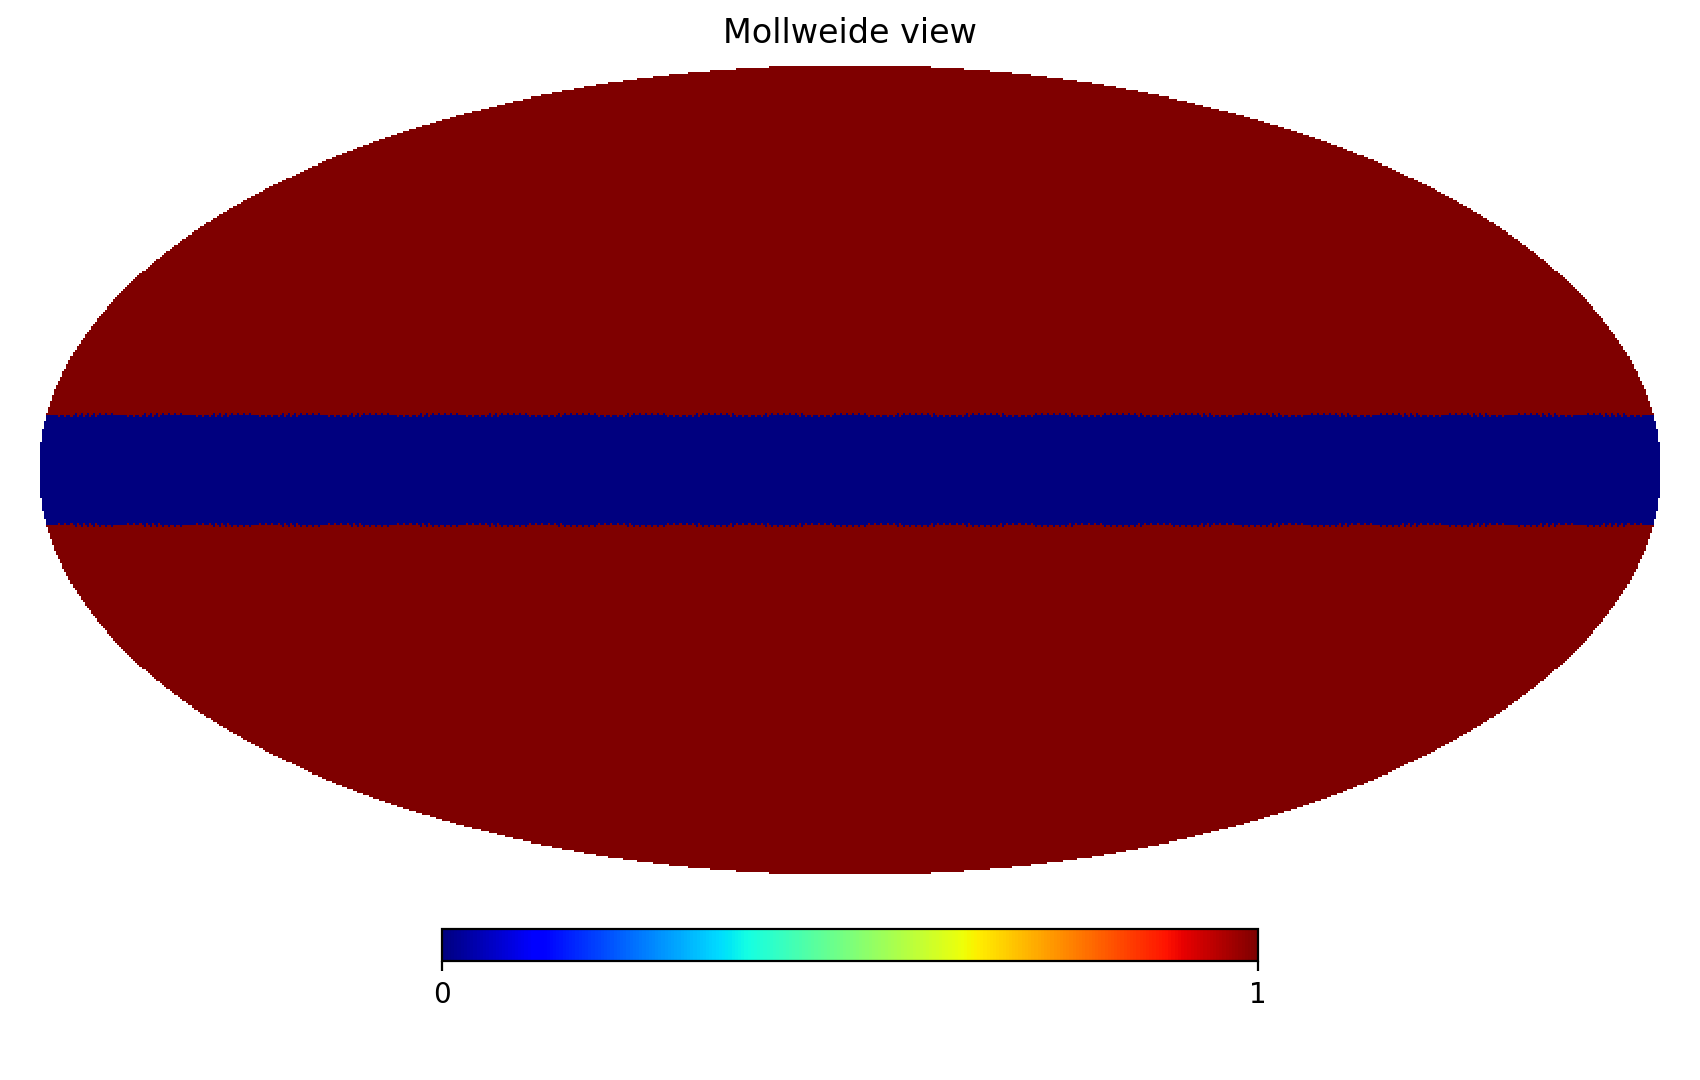

In [571]:
smask=zeros(npix,"double")
mask=zeros(npix,"double") ;apow=0.
theta=h.pix2ang(nside,arange(npix))[0]*180./pi
bw=10.

tmaxn=90-bw ; tmaxs=90+bw

for i in range(npix):
    if theta[i]<tmaxn-apow or theta[i]>tmaxs+apow:
            mask[i]=1.
    elif theta[i]>tmaxn and theta[i]<tmaxs:
            mask[i]=0.
    elif theta[i]<=tmaxn and theta[i]>=tmaxn-apow:
            x=(theta[i]-tmaxn+apow)*pi/(2.*apow)
            mask[i]=cos(x)**2.
    elif theta[i]>=tmaxs and theta[1]<=tmaxs+apow:
            x=(tmaxs+apow-theta[i])*pi/(2.*apow)
            mask[i]=cos(x)**2.
            
mask=mask
smask[theta<tmaxn-apow]=1. ; smask[theta>tmaxs+apow]=1.
#smask=1.-smask
h.mollview(mask)

In [668]:
d=tqu*mask
cq_in=np.zeros(npix,"double")
cu_in=np.zeros(npix,"double")
cq_out=np.zeros(npix,"double")
cu_out=np.zeros(npix,"double")
cnt=-1

maxiter=100

In [669]:
for i in range(maxiter+1):
    din=[d[0],d[1][:]-cq_in[:]-cq_out[:],d[2][:]-cu_in[:]-cu_out[:]]
    htqu=h.alm2map(h.map2alm(din,lmax=lmax,iter=0),nside,verbose=False)
    cq_in[:]=cq_in[:]+(htqu[1]-d[1])*mask ; cu_in=cu_in+(htqu[2]-d[2])*mask
    cq_out[:]=(cq_out[:] + htqu[1]*(1.-mask))/2. ; cu_out[:]=(cu_out + htqu[2]*(1.-mask))/2.
    cnt=cnt+1 #; print cnt
print cnt

100


<IPython.core.display.Javascript object>


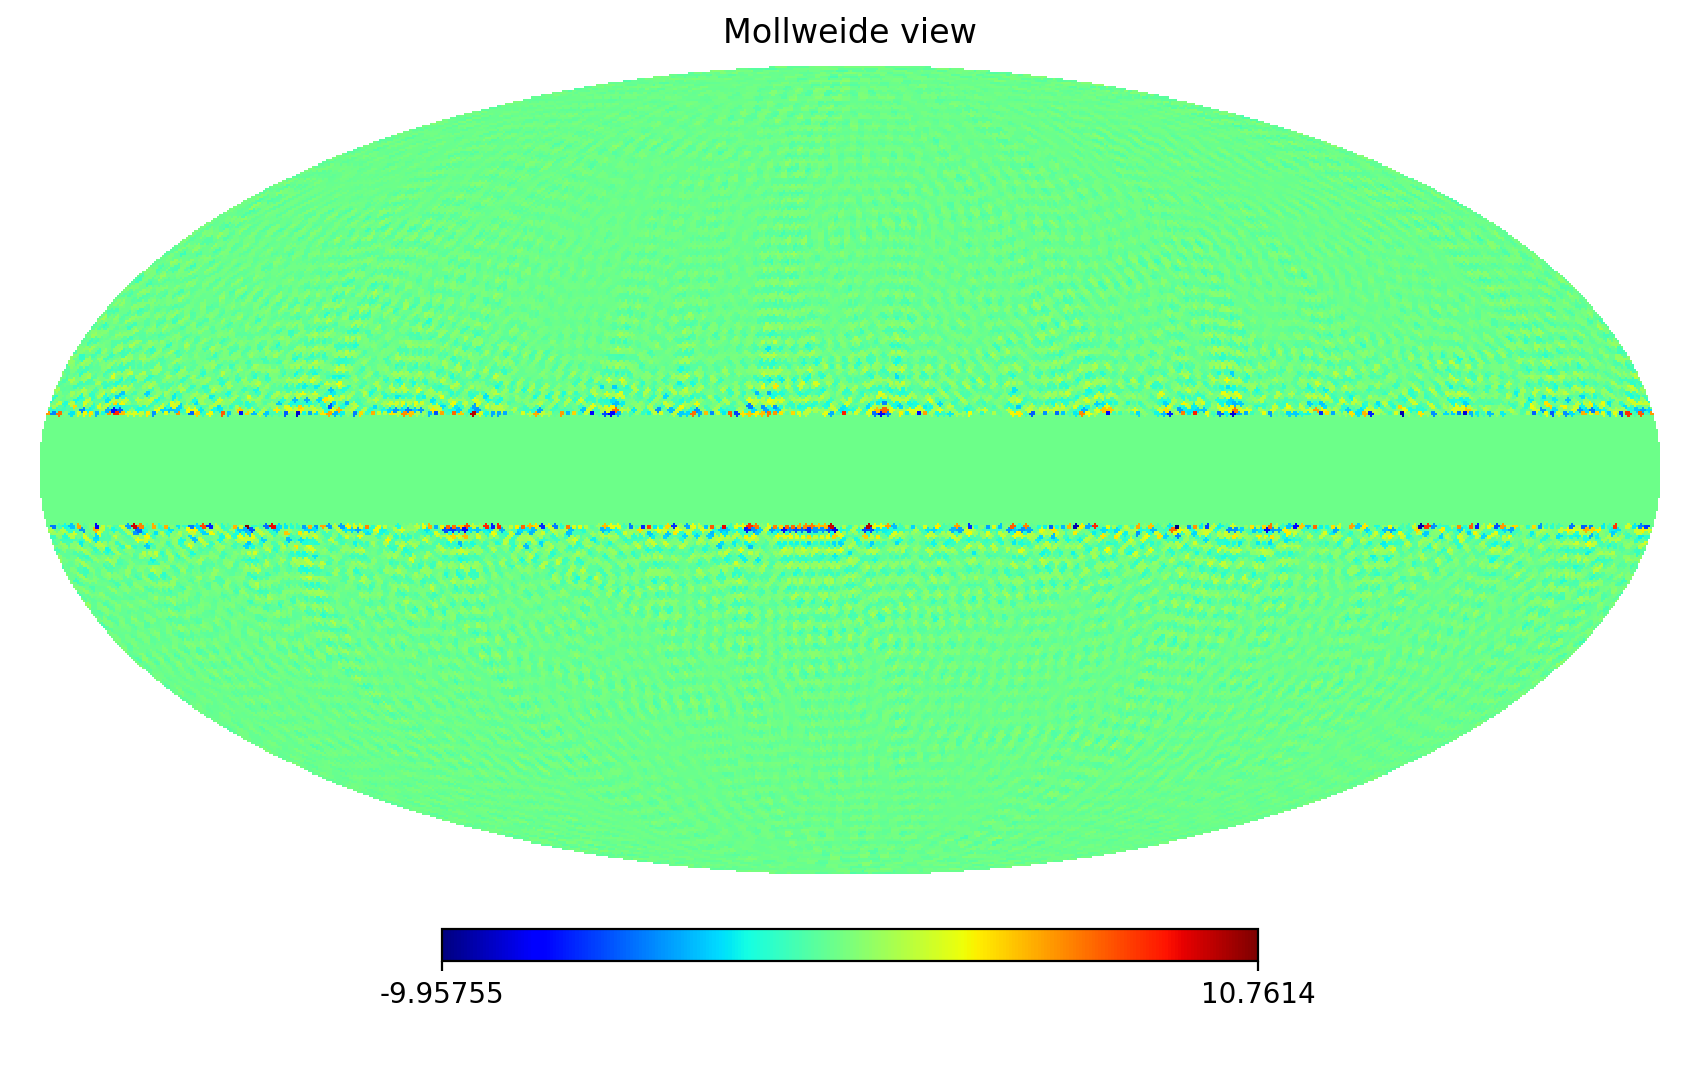

In [670]:
h.mollview(cq_in)

<IPython.core.display.Javascript object>


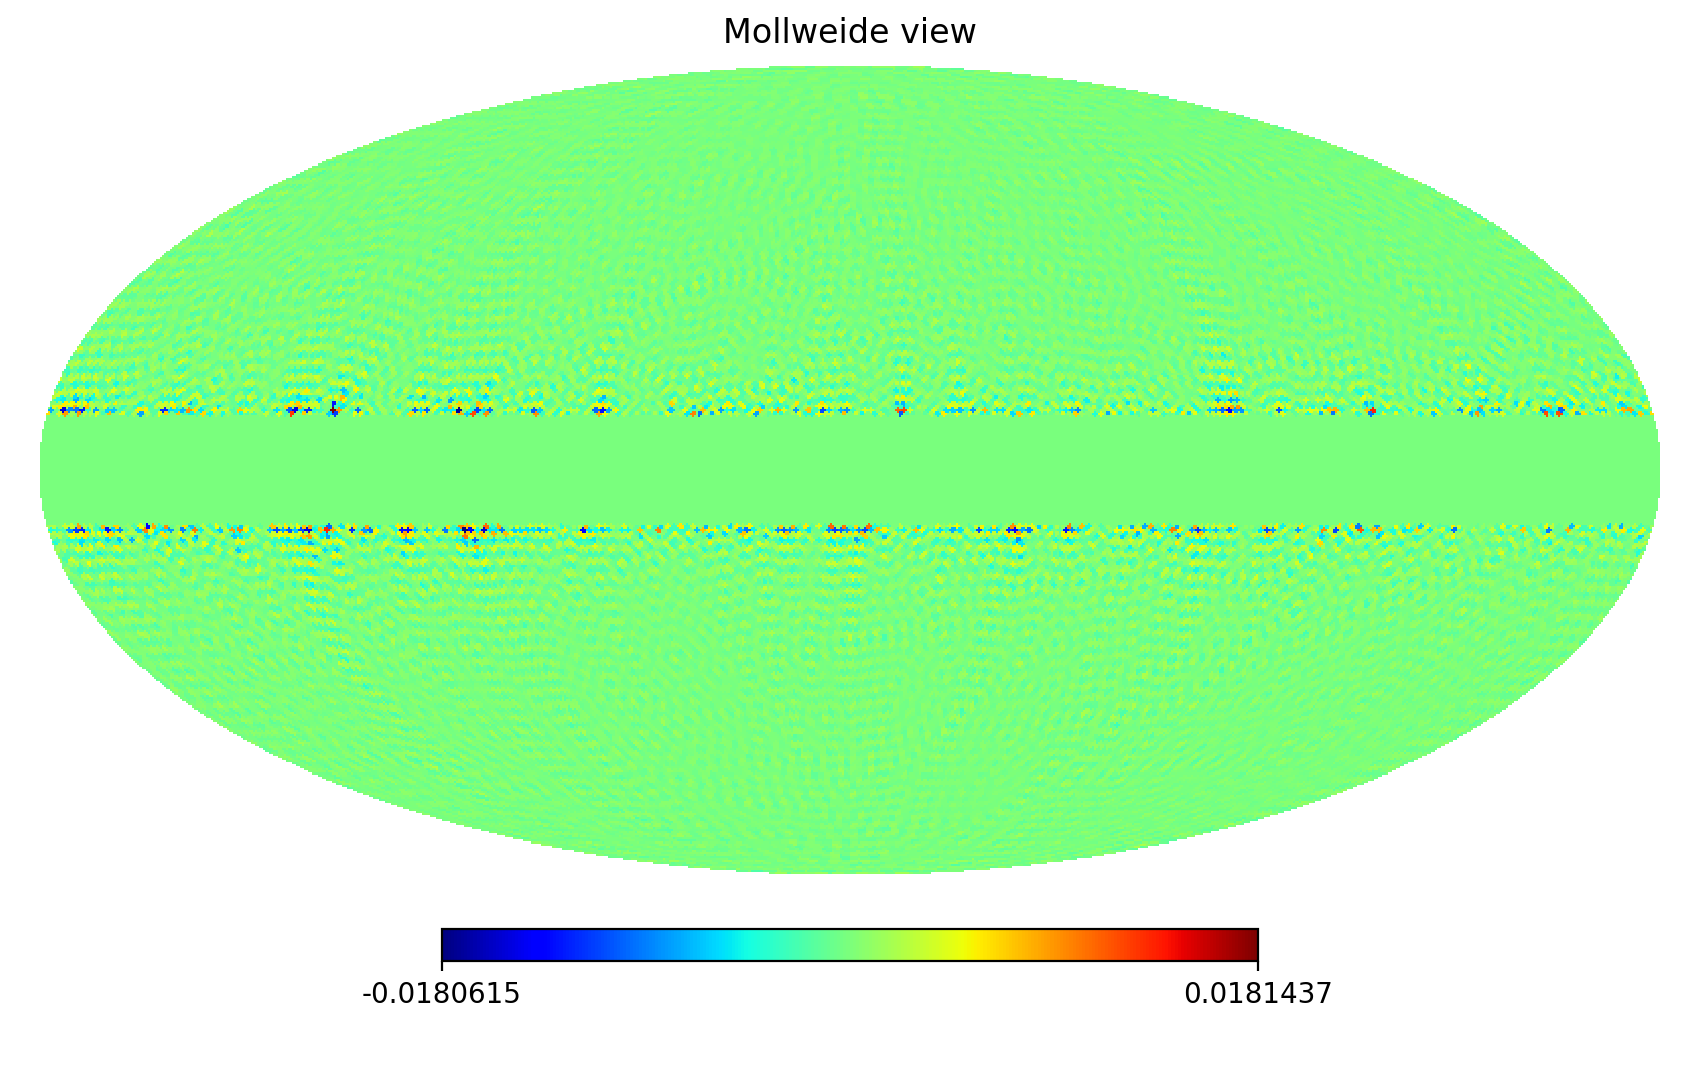

<IPython.core.display.Javascript object>


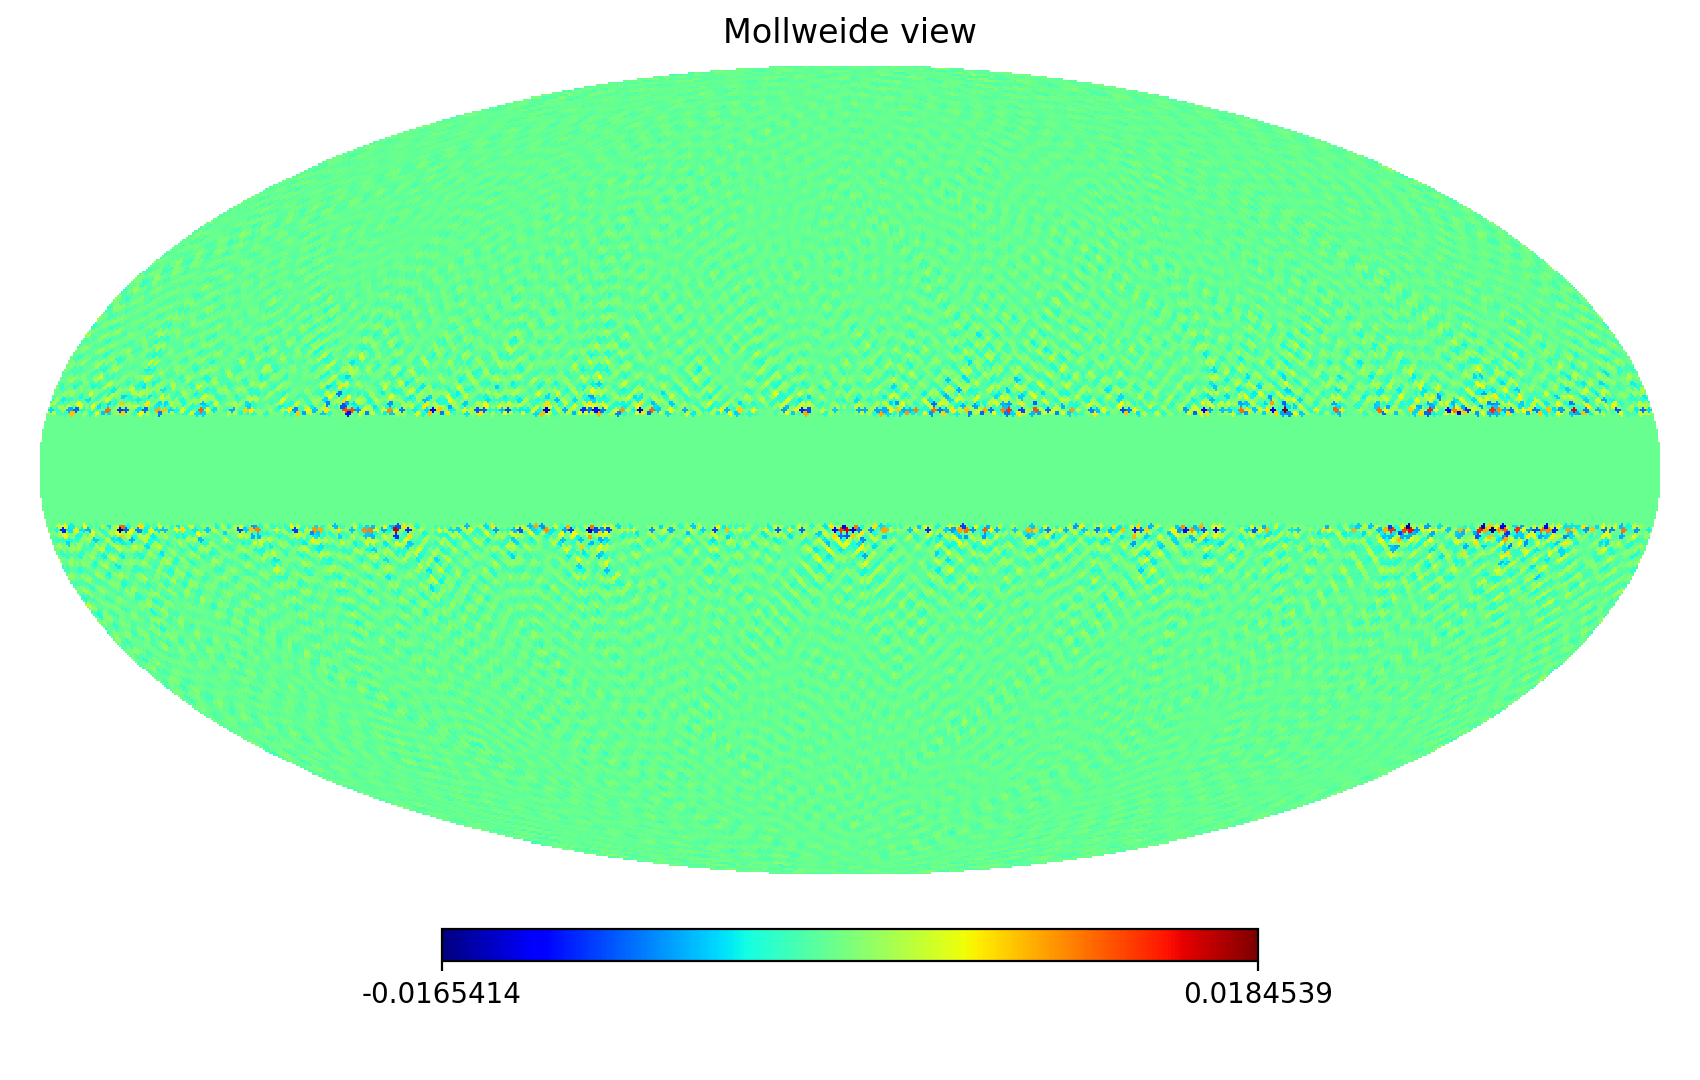

In [655]:
h.mollview(htqu[1]*mask - d[1])
h.mollview(htqu[2]*mask - d[2])

<IPython.core.display.Javascript object>


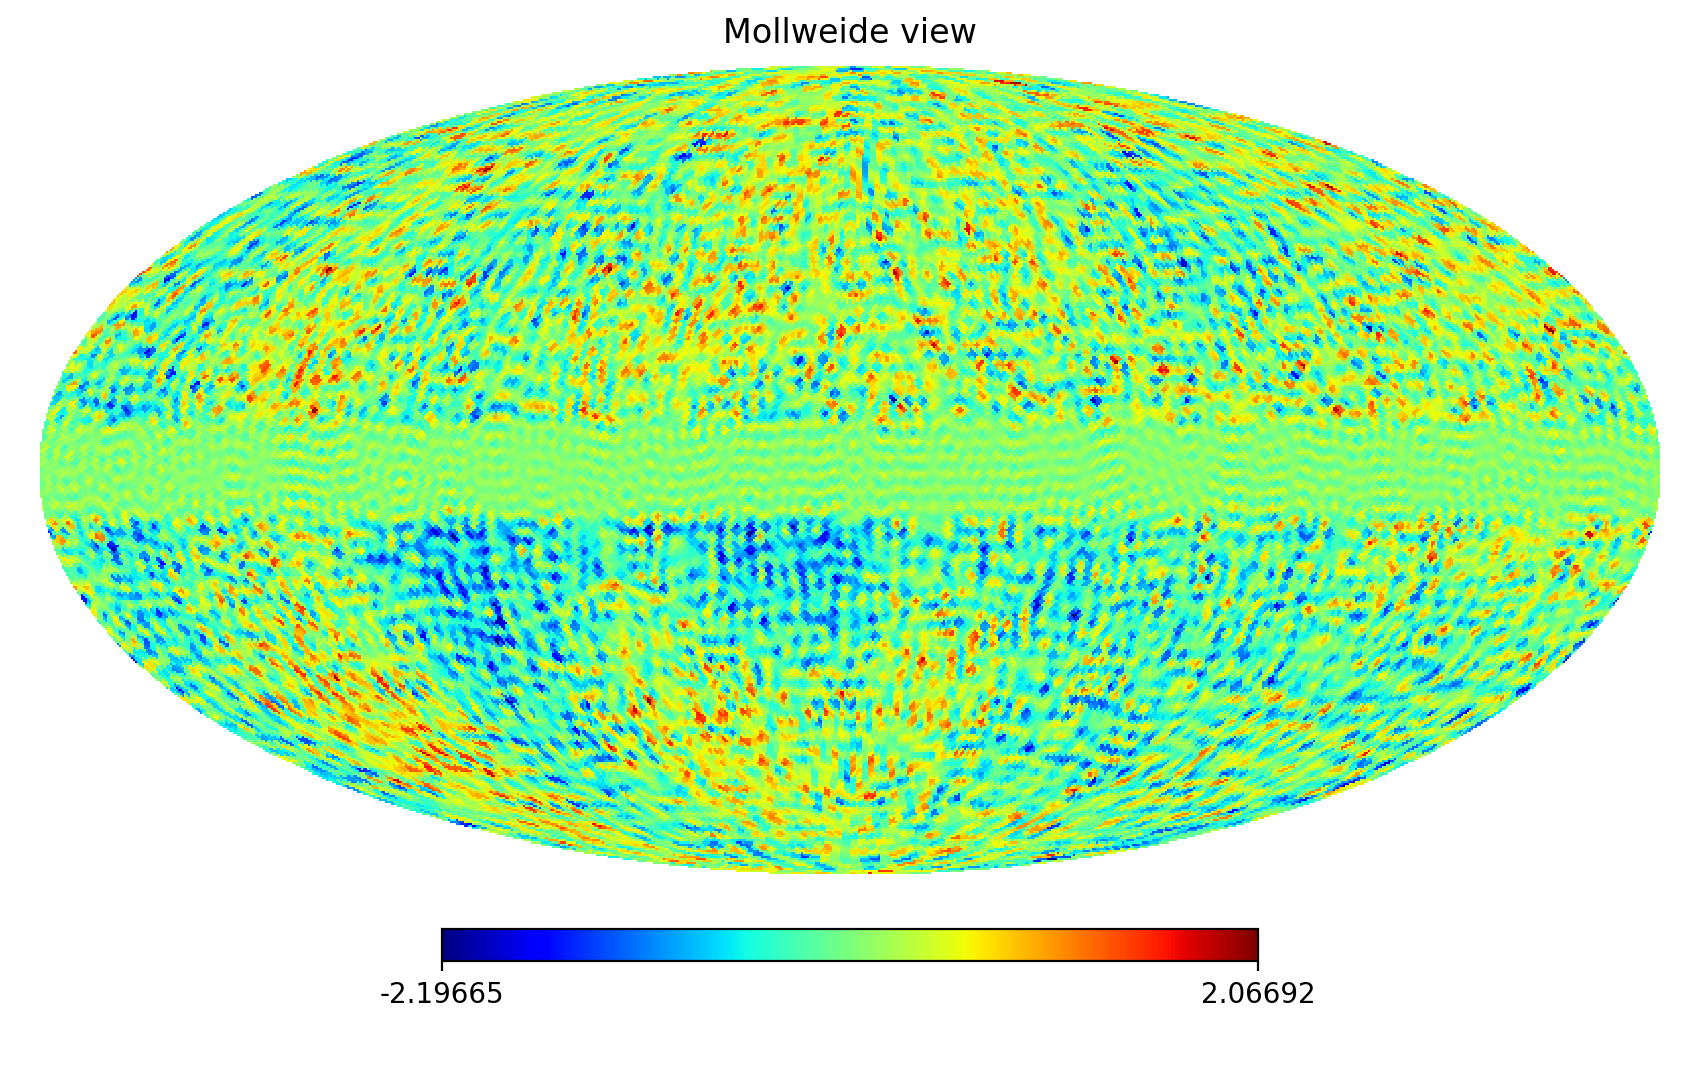

<IPython.core.display.Javascript object>


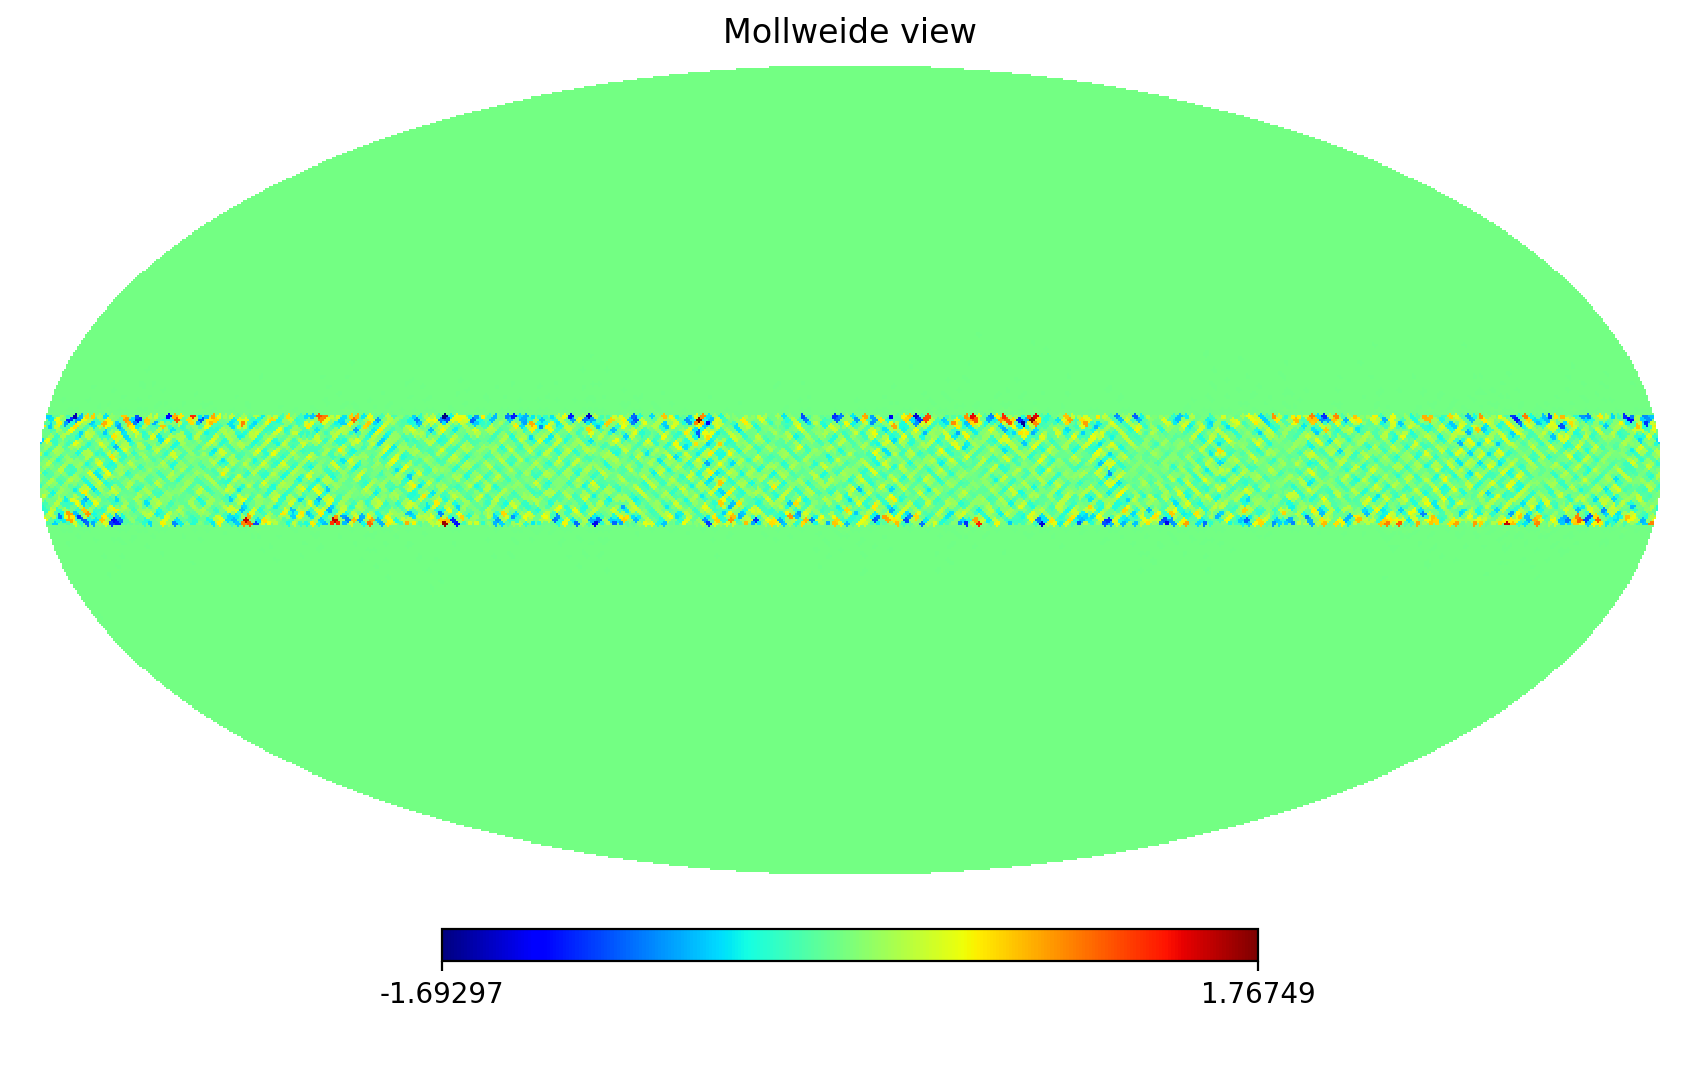

In [657]:
h.mollview(htqu[1]-d[1]*0)
h.mollview((htqu[2]-d[2]))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


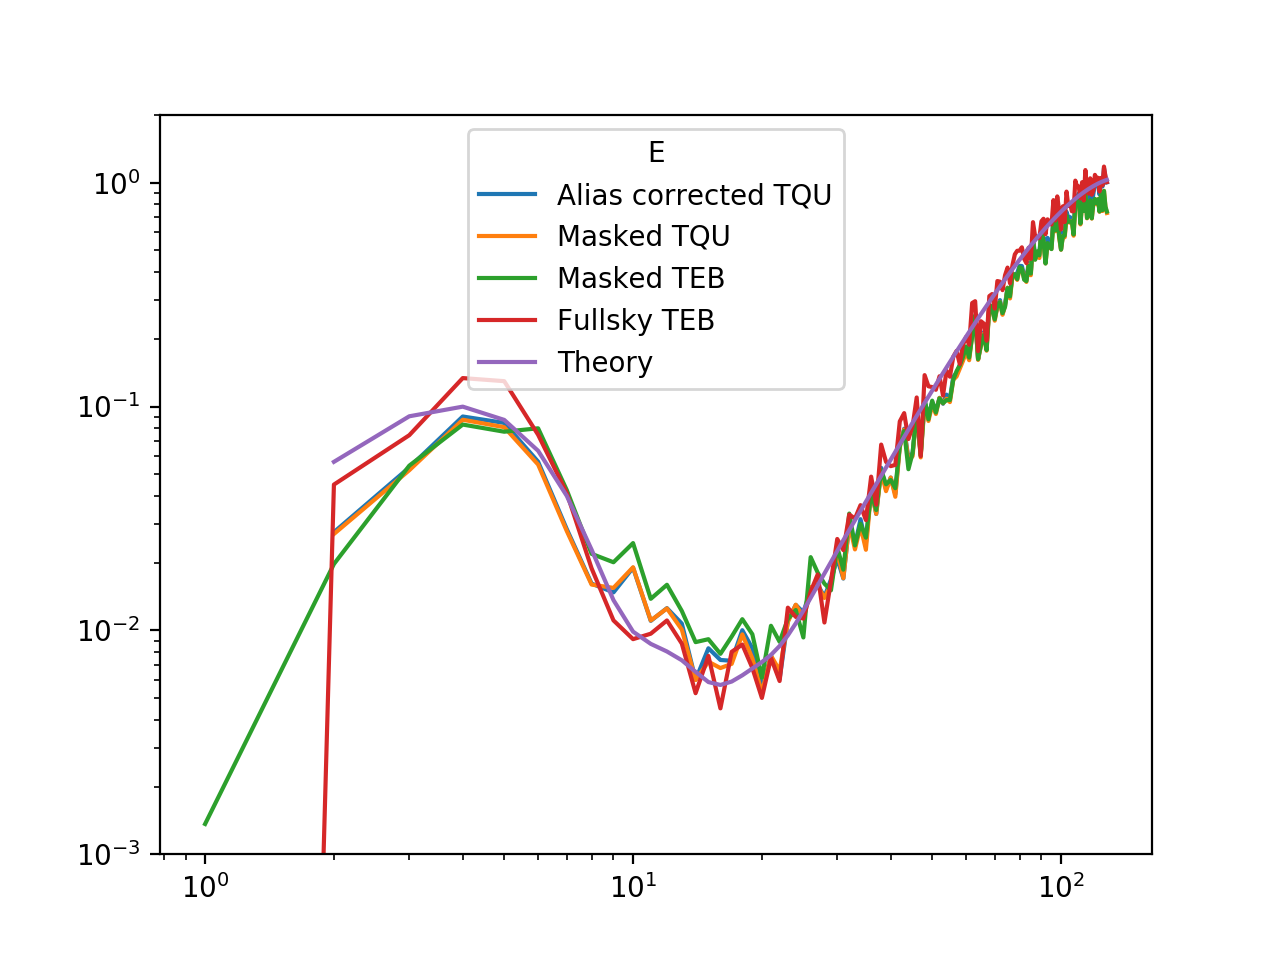

<IPython.core.display.Javascript object>


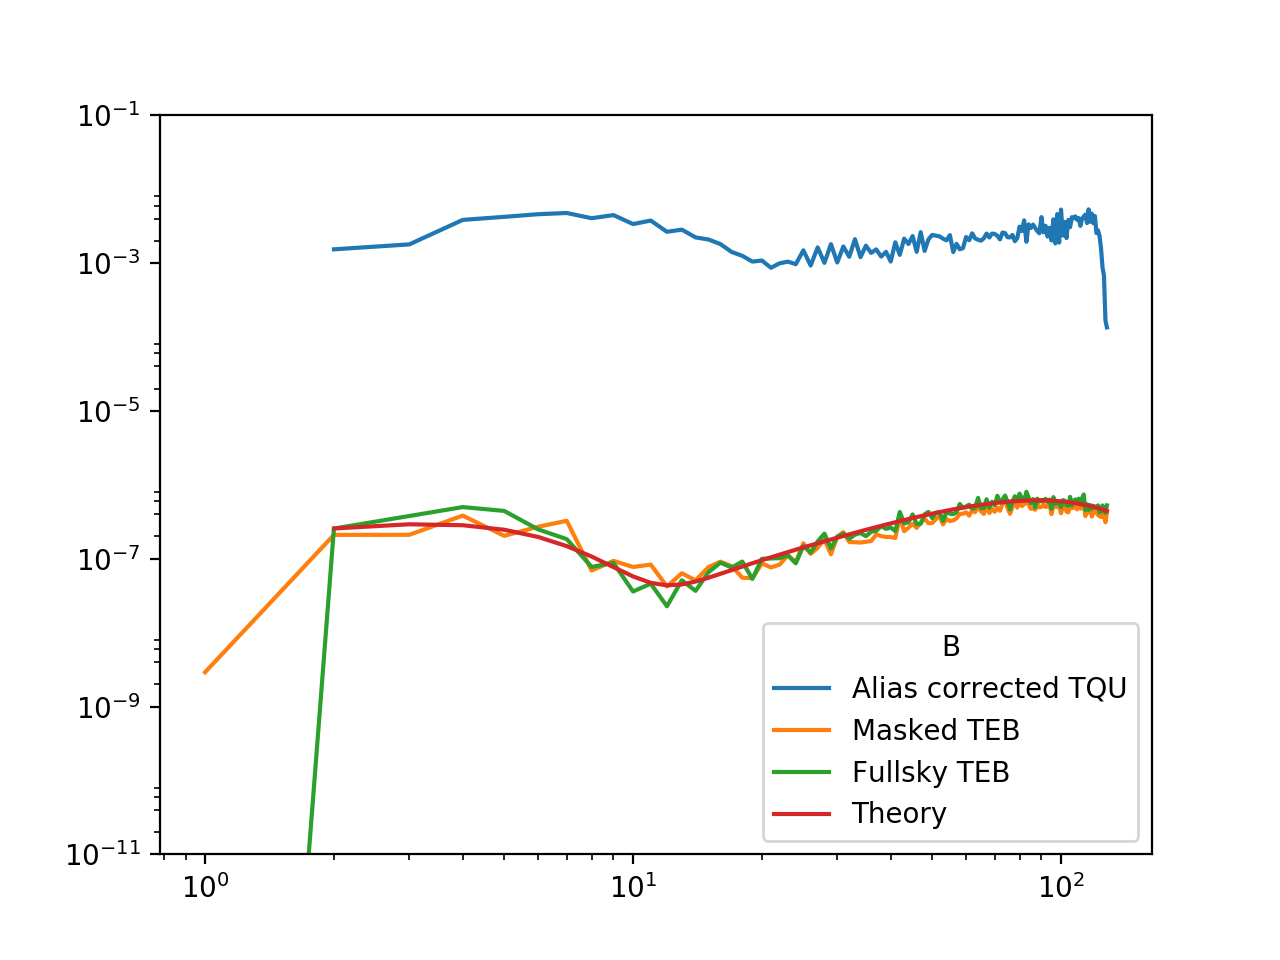

(1e-11, 0.1)

In [658]:
teb=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=hiter),nside,pol=False)
clteb=h.alm2cl(h.map2alm(teb*mask,lmax=lmax,pol=False,iter=hiter))
cltebfs=h.alm2cl(h.map2alm(teb,lmax=lmax,pol=False,iter=hiter))
clhtqu=h.alm2cl(h.map2alm(htqu,lmax=lmax,pol=True,iter=hiter))
cltqu=h.alm2cl(h.map2alm(tqu*mask,lmax=lmax,pol=True,iter=hiter))

ell=arange(lmax+1) ; fll=ell*(ell+1)/(2.*pi)

figure()
plot(ell,fll*clhtqu[1],label="Alias corrected TQU")
plot(ell,fll*cltqu[1],label="Masked TQU")
plot(ell,fll*clteb[1],label="Masked TEB")
plot(ell,fll*cltebfs[1],label="Fullsky TEB")
plot(ell,fll*clr[1][:lmax+1],label="Theory")
loglog()
legend(loc=0,title="E")
ylim(1e-3,2)

figure()
plot(ell,fll*clhtqu[2],label="Alias corrected TQU")
#plot(ell,fll*cltqu[2],label="Masked TQU")
plot(ell,fll*clteb[2],label="Masked TEB")
plot(ell,fll*cltebfs[2],label="Fullsky TEB")
plot(ell,fll*clr[2][:lmax+1],label="Theory")
legend(loc=0,title="B")
loglog()
ylim(1e-11,1e-1)

<IPython.core.display.Javascript object>


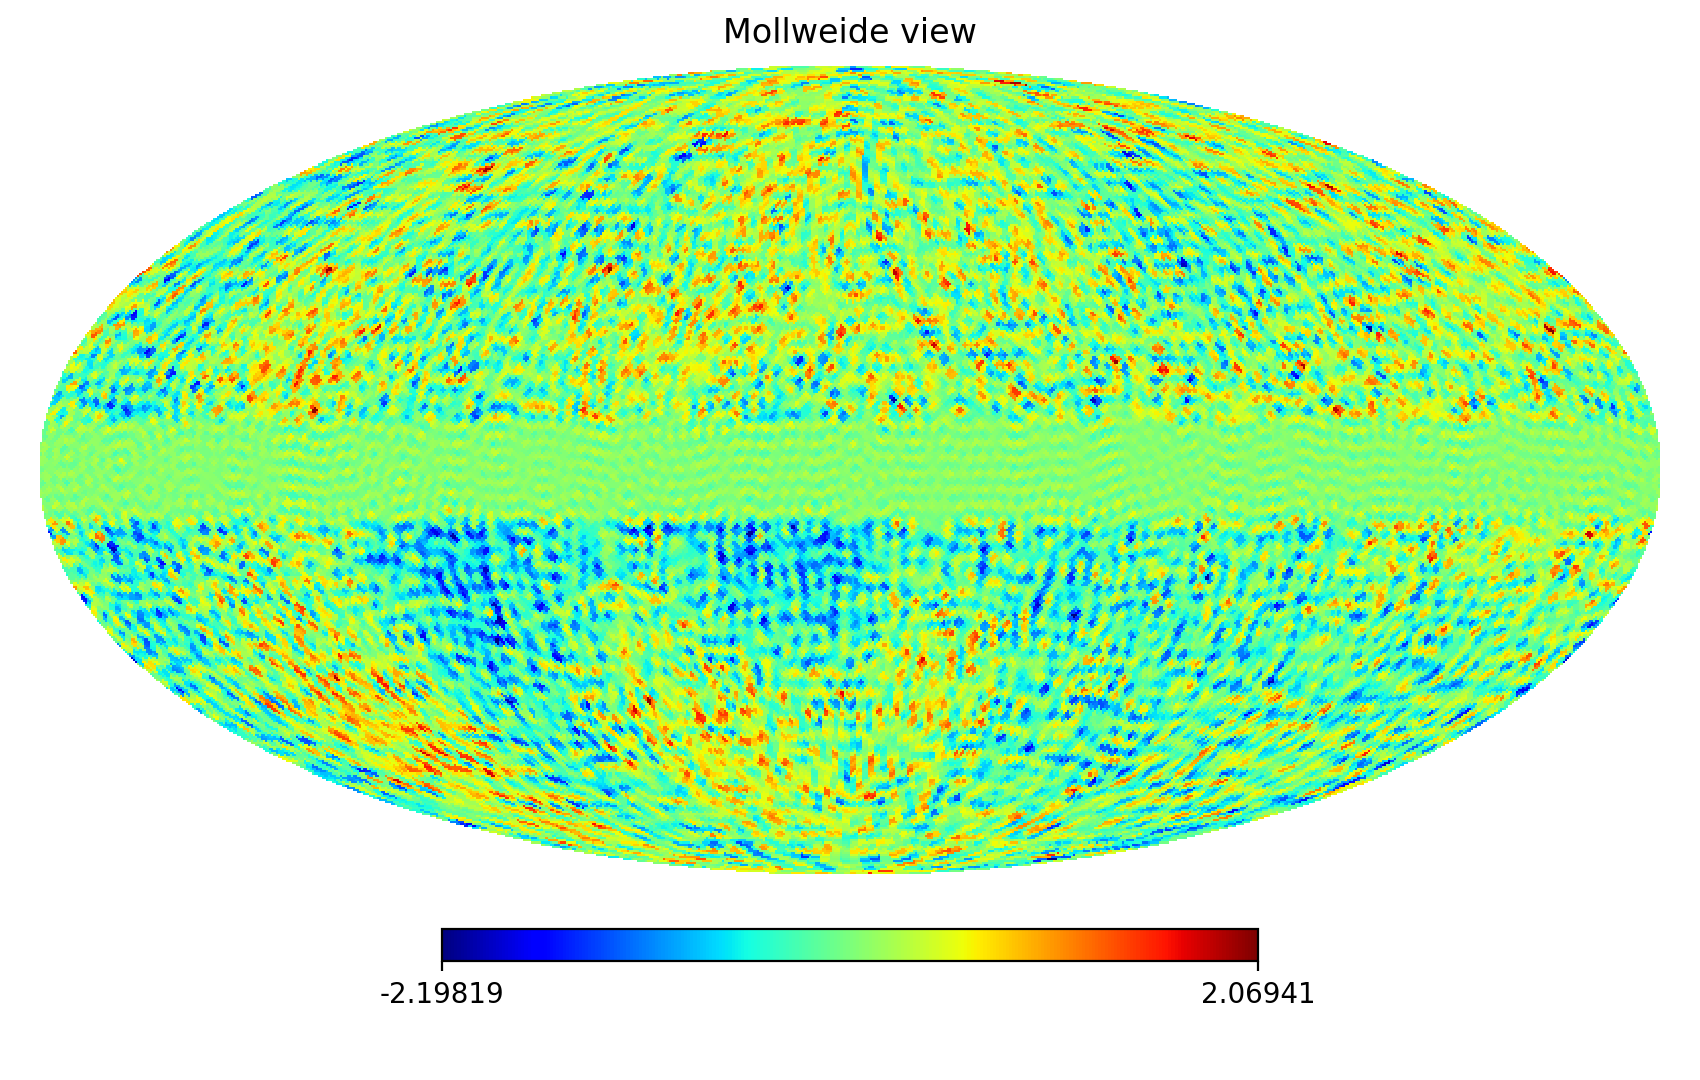

<IPython.core.display.Javascript object>


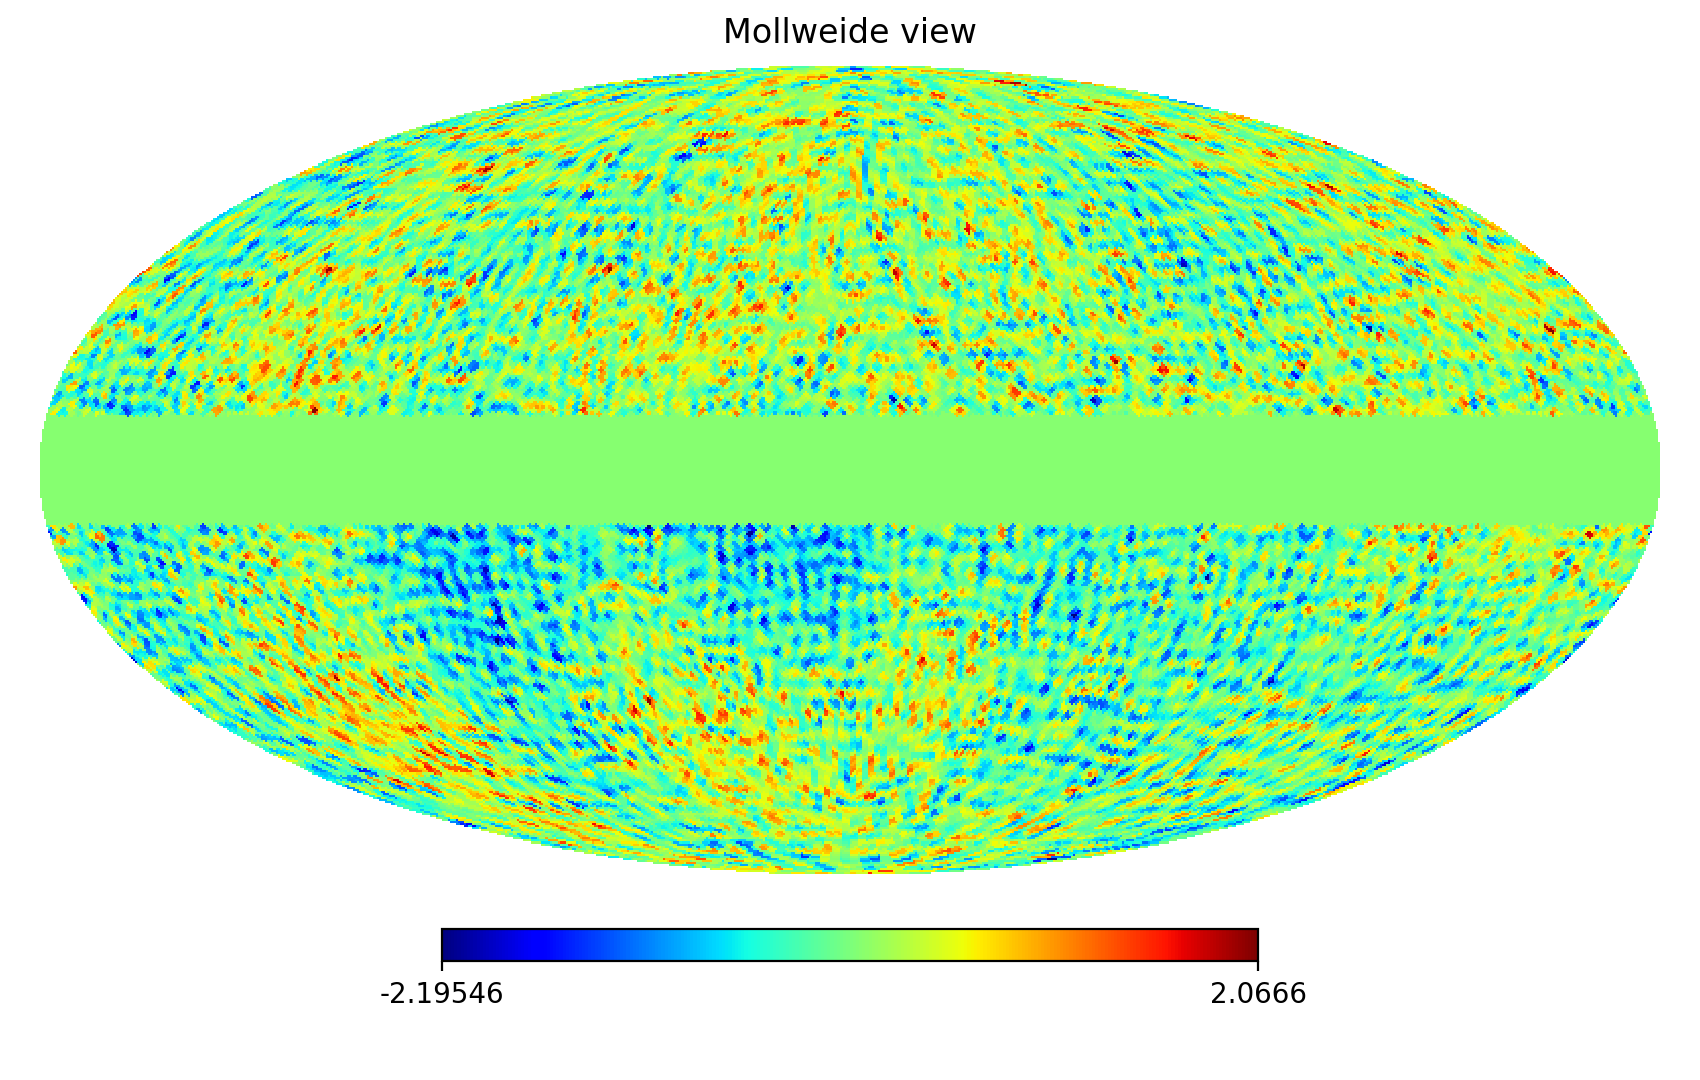

In [580]:
h.mollview(htqu[1])
h.mollview(d[1])